# Extension to the digits classification

Try to extract the digits from a picture.
Assume that the picture contains only digits for now.
Use scikit-image for this to stay in the same framework.
Start with loading the relevant modules and the picture.

In [16]:
from pylab import np, plt
%matplotlib inline
from skimage.io import imread
im = imread('my_digits/my_digits.jpg')

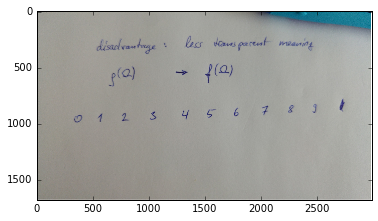

In [17]:
plt.imshow(im, cmap='gray_r', interpolation='none')

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

from skimage import data
from skimage.filters import threshold_otsu, rank
from skimage.segmentation import clear_border
from skimage.measure import label
from skimage.morphology import closing, square
from skimage.measure import regionprops
from skimage.color import label2rgb
from skimage.util import img_as_ubyte

In [ ]:
image = np.mean(im, axis=2)[800:1200, 100:800]
image = image / np.max(image) * 256
image = np.max(image) - image

In [ ]:
plt.figure(figsize=(15,10))
plt.imshow(image)
plt.colorbar(orientation='horizontal')

In [117]:
# apply threshold
# thresh = threshold_otsu(image)
# image = img_as_ubyte(image)
selem = square(500)
thresh = rank.otsu(image, selem)

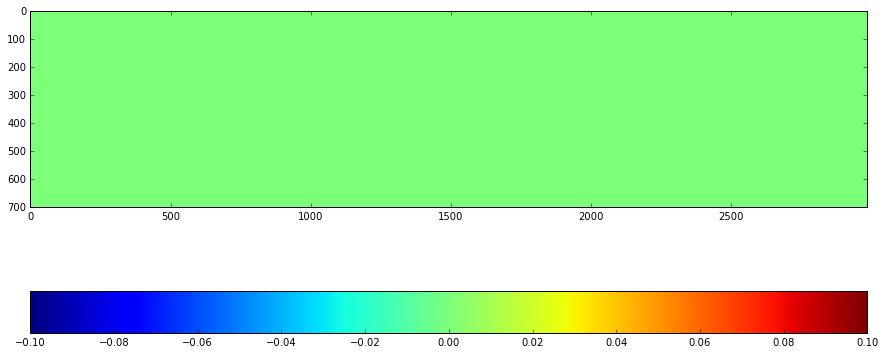

In [145]:
timg = image.copy()
timg[image < thresh] = 0
# timg[image >= thresh] = 1
plt.figure(figsize=(15,10))
plt.imshow(timg)
plt.colorbar(orientation='horizontal')

In [119]:
bw = closing(timg > thresh, square(4))
# remove artifacts connected to image border
cleared = bw.copy()
clear_border(cleared)
# label image regions
label_image = label(cleared)
image_label_overlay = label2rgb(label_image, image=image)

In [120]:
np.unique(label_image)

array([0], dtype=int64)

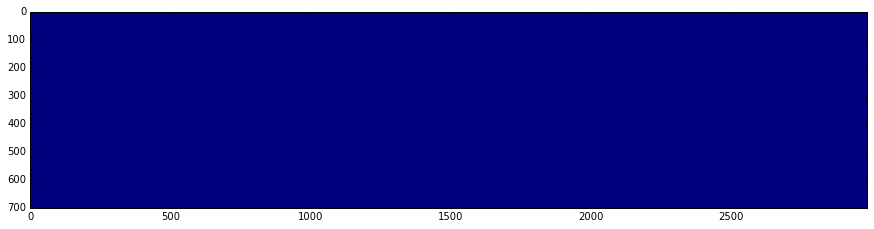

In [121]:
plt.figure(figsize=(15,10))
plt.imshow(bw)

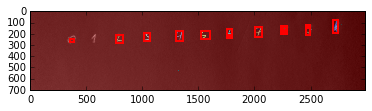

In [88]:

image_label_overlay = label2rgb(label_image, image=image)

fig, ax = plt.subplots(ncols=1, nrows=1, figsize=(6, 6))
ax.imshow(image_label_overlay)

for region in regionprops(label_image):

    # skip small images
    if region.area < 100:
        continue

    # draw rectangle around segmented coins
    minr, minc, maxr, maxc = region.bbox
    rect = mpatches.Rectangle((minc, minr), maxc - minc, maxr - minr,
                              fill=False, edgecolor='red', linewidth=2)
    ax.add_patch(rect)

plt.show()

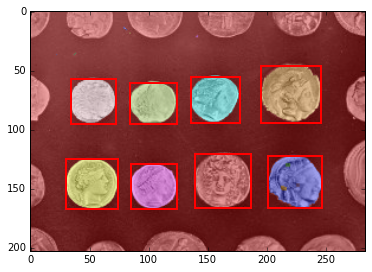

In [146]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

from skimage import data
from skimage.filters import threshold_otsu
from skimage.segmentation import clear_border
from skimage.measure import label
from skimage.morphology import closing, square
from skimage.measure import regionprops
from skimage.color import label2rgb


image = data.coins()[50:-50, 50:-50]

# apply threshold
thresh = threshold_otsu(image)
bw = closing(image > thresh, square(3))

# remove artifacts connected to image border
cleared = bw.copy()
clear_border(cleared)

# label image regions
label_image = label(cleared)
image_label_overlay = label2rgb(label_image, image=image)

fig, ax = plt.subplots(ncols=1, nrows=1, figsize=(6, 6))
ax.imshow(image_label_overlay)

for region in regionprops(label_image):

    # skip small images
    if region.area < 100:
        continue

    # draw rectangle around segmented coins
    minr, minc, maxr, maxc = region.bbox
    rect = mpatches.Rectangle((minc, minr), maxc - minc, maxr - minr,
                              fill=False, edgecolor='red', linewidth=2)
    ax.add_patch(rect)

plt.show()

In [135]:
image.shape

(203L, 284L)

In [136]:
image_label_overlay.shape

(203L, 284L, 3L)

Try using blob detection.

In [137]:

from skimage.feature import blob_dog, blob_log, blob_doh
from math import sqrt
from skimage.color import rgb2gray

In [ ]:
blobs_doh = blob_doh(image, min_sigma=1, max_sigma=30)

In [ ]:
print blobs_doh